# El Valor Esperado como Centro de Gravedad

El **valor esperado** de una variable aleatoria real (*VAR*) se puede pensar como el promedio ponderado de todos los posibles valores que puede tomar dicha variable. Los **pesos** o **ponderadores** corresponden a las probabilidades asociadas a cada valor.

- Cuando la VAR es **discreta** se define así:

$$
\mathbb{E}[X] = \sum_{i=1}^{n} x_i p_i
$$

- Cuando la VAR es **contunua** se define así:


$$
\mathbb{E}[X] = \int_{-\infty}^{\infty} x f(x) \, dx
$$

## Caso discreto

El experimento aleatorio es el lanzamiento de una moneda 4 veces. Con base en este experimento creamos un espacio de probabilidad con la sigma algebra total y un vector de probabilidades.
Entonces generamos una variable aleatoria X de esta manera:

$$
X = 
\begin{cases}
  \text{Gana } \$5000, & \text{si } \text{salen 3 caras o más}. \\
  \text{Pierde } \$2000, & \text{si } \text{salen 2  o menos}
\end{cases}
$$


In [1]:
import numpy as np
import itertools

# cara = 1
# sello = 0
np.random.seed(42)
n_samples = 10000 # numero de veces que repetimos el experimento
omega = np.array(list(itertools.product([1, 0], repeat=4)))
omega

array([[1, 1, 1, 1],
       [1, 1, 1, 0],
       [1, 1, 0, 1],
       [1, 1, 0, 0],
       [1, 0, 1, 1],
       [1, 0, 1, 0],
       [1, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 1, 1, 1],
       [0, 1, 1, 0],
       [0, 1, 0, 1],
       [0, 1, 0, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 0]])

In [2]:
# caso equiprobable
p_equi = np.full(len(omega), 1/len(omega))
idx_equi = np.random.choice(len(omega), size=n_samples, replace=True, p=p_equi)
sample_equi = omega[idx_equi]
for w,p in zip(omega,p_equi):
    print(f"El punto muestral '{w}' tiene una probabilidad de '{p}'")

El punto muestral '[1 1 1 1]' tiene una probabilidad de '0.0625'
El punto muestral '[1 1 1 0]' tiene una probabilidad de '0.0625'
El punto muestral '[1 1 0 1]' tiene una probabilidad de '0.0625'
El punto muestral '[1 1 0 0]' tiene una probabilidad de '0.0625'
El punto muestral '[1 0 1 1]' tiene una probabilidad de '0.0625'
El punto muestral '[1 0 1 0]' tiene una probabilidad de '0.0625'
El punto muestral '[1 0 0 1]' tiene una probabilidad de '0.0625'
El punto muestral '[1 0 0 0]' tiene una probabilidad de '0.0625'
El punto muestral '[0 1 1 1]' tiene una probabilidad de '0.0625'
El punto muestral '[0 1 1 0]' tiene una probabilidad de '0.0625'
El punto muestral '[0 1 0 1]' tiene una probabilidad de '0.0625'
El punto muestral '[0 1 0 0]' tiene una probabilidad de '0.0625'
El punto muestral '[0 0 1 1]' tiene una probabilidad de '0.0625'
El punto muestral '[0 0 1 0]' tiene una probabilidad de '0.0625'
El punto muestral '[0 0 0 1]' tiene una probabilidad de '0.0625'
El punto muestral '[0 0 0

In [3]:
# caso no equiprobable
p_nequi = (4 - omega.sum(axis=1) + 1 )/(4 - omega.sum(axis=1) + 1).sum() # se suma 1 para evitar probabilidades de 0
idx_nequi =  np.random.choice(len(omega), size=n_samples, replace=True, p=p_nequi)
sample_nequi = omega[idx_nequi]
for w,p in zip(omega,p_nequi):
    print(f"El punto muestral '{w}' tiene una probabilidad de '{p:2f}'")

El punto muestral '[1 1 1 1]' tiene una probabilidad de '0.020833'
El punto muestral '[1 1 1 0]' tiene una probabilidad de '0.041667'
El punto muestral '[1 1 0 1]' tiene una probabilidad de '0.041667'
El punto muestral '[1 1 0 0]' tiene una probabilidad de '0.062500'
El punto muestral '[1 0 1 1]' tiene una probabilidad de '0.041667'
El punto muestral '[1 0 1 0]' tiene una probabilidad de '0.062500'
El punto muestral '[1 0 0 1]' tiene una probabilidad de '0.062500'
El punto muestral '[1 0 0 0]' tiene una probabilidad de '0.083333'
El punto muestral '[0 1 1 1]' tiene una probabilidad de '0.041667'
El punto muestral '[0 1 1 0]' tiene una probabilidad de '0.062500'
El punto muestral '[0 1 0 1]' tiene una probabilidad de '0.062500'
El punto muestral '[0 1 0 0]' tiene una probabilidad de '0.083333'
El punto muestral '[0 0 1 1]' tiene una probabilidad de '0.062500'
El punto muestral '[0 0 1 0]' tiene una probabilidad de '0.083333'
El punto muestral '[0 0 0 1]' tiene una probabilidad de '0.083

In [4]:
# definicion de la variable aleatoria
def x_var(s):
    count_caras = s.sum(axis=1)
    v_x = np.vectorize(lambda x : 5000 if x >=3 else -2000)
    return v_x(count_caras)

# definicion de la probabilidad inducida por la variable aleatoria x
def induced_prob(x_values, p_values):
    soporte_x, inverse_idx = np.unique(x_values, return_inverse=True)
    p_x = np.zeros_like(soporte_x, dtype=float)
    np.add.at(p_x, inverse_idx, p_values)
    return soporte_x, p_x

In [5]:
# Valor esperado de la variable con vector equiprobable
x_values, p_x_equi = induced_prob(x_var(omega), p_equi)
for x, p in zip(x_values, p_x_equi):
    print(f"El valor: '{x}' tiene una probabilidad de '{p}'")
ex_equi = (x_values * p_x_equi).sum()
print(f"El valor esperado de la variable aleatoria x es: '${ex_equi}'")


El valor: '-2000' tiene una probabilidad de '0.6875'
El valor: '5000' tiene una probabilidad de '0.3125'
El valor esperado de la variable aleatoria x es: '$187.5'


In [6]:
# Valor esperado de la variable con vector NO equiprobable
x_values, p_x_nequi = induced_prob(x_var(omega), p_nequi)
for x, p in zip(x_values, p_x_nequi):
    print(f"El valor: '{x}' tiene una probabilidad de '{p}'")
ex_nequi = (x_values * p_x_nequi).sum()
print(f"El valor esperado de la variable aleatoria x es: '${ex_nequi}'")

El valor: '-2000' tiene una probabilidad de '0.8125'
El valor: '5000' tiene una probabilidad de '0.18749999999999997'
El valor esperado de la variable aleatoria x es: '$-687.5000000000001'


#

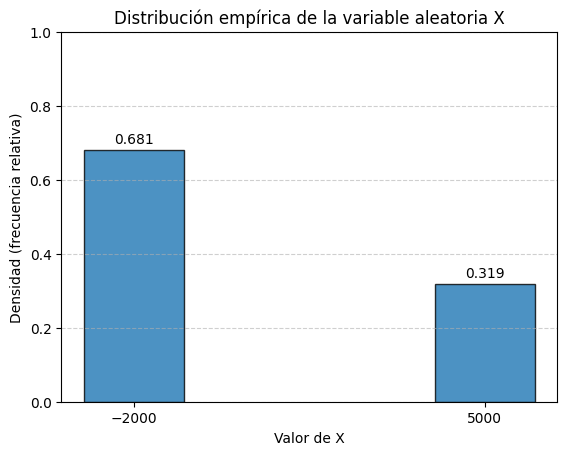

El promedio de la variable de ingresos es '$233.000000'


In [7]:
# comparacion con muestreo
# caso equiprobable
import matplotlib.pyplot as plt

valores, counts = np.unique(x_var(sample_equi), return_counts=True)
probs_empiricas = counts / counts.sum()  # densidad

# Graficar
plt.bar(valores, probs_empiricas, width=2000, edgecolor='black', alpha=0.8)
plt.title('Distribución empírica de la variable aleatoria X')
plt.xlabel('Valor de X')
plt.ylabel('Densidad (frecuencia relativa)')
plt.xticks(valores)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.6)
for x, y in zip(valores, probs_empiricas):
    plt.text(x, y + 0.01, f'{y:.3f}', ha='center', va='bottom')
plt.show()

print(f"El promedio de la variable de ingresos es '${x_var(sample_equi).mean():2f}'")

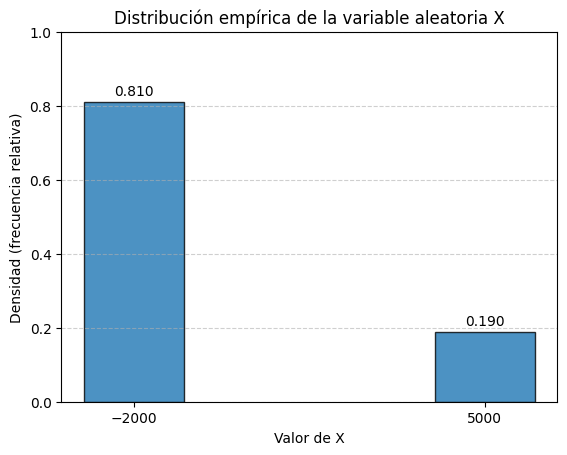

El promedio de la variable de ingresos es '$-672.100000


In [8]:
# comparacion con muestreo
# caso NO equiprobable
import matplotlib.pyplot as plt

valores, counts = np.unique(x_var(sample_nequi), return_counts=True)
probs_empiricas = counts / counts.sum()  # densidad

# Graficar
plt.bar(valores, probs_empiricas, width=2000, edgecolor='black', alpha=0.8)
plt.title('Distribución empírica de la variable aleatoria X')
plt.xlabel('Valor de X')
plt.ylabel('Densidad (frecuencia relativa)')
plt.xticks(valores)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.6)
for x, y in zip(valores, probs_empiricas):
    plt.text(x, y + 0.01, f'{y:.3f}', ha='center', va='bottom')
plt.show()

print(f"El promedio de la variable de ingresos es '${x_var(sample_nequi).mean():2f}")

## 

### ¿Por qué el valor esperado de una variable continua se calcula con una integral?

Sea $$X$$ una variable aleatoria continua con función de densidad $f_X(x)$. El valor esperado (o esperanza matemática) se define como:

$$
\mathbb{E}[X] = \int_{-\infty}^{\infty} x \cdot f_X(x) \, dx
$$

---

### ¿Por qué aparece una integral?

La integral aparece porque estamos sumando una cantidad infinitesimalmente pequeña de "valor por probabilidad" en cada punto del dominio de $X$.

En lugar de una suma finita (como en el caso discreto), usamos una suma continua (una integral) para acumular los efectos de todos los valores posibles de $X$.

---

Para un incremento pequeño $$\Delta x \approx 0 \approx dx$$, se tiene:

$$
P(x < X \leq x + \Delta x) = F_X(x + \Delta x) - F_X(x)
$$

y usando la derivada, esto se puede aproximar por:

$$
P(x < X \leq x + \Delta x) \approx f_X(x) \cdot dx
$$

Vea esto como la aproximación de la derivada unilateral.

---

Cada término $x \cdot f_X(x) \cdot dx$ representa la contribución local de ese valor al promedio global.

---

### Analogía con la física: centro de masa

En física, si tienes una barra (o lámina) con densidad que varía con la posición $x$, su centro de masa se calcula como:

$$
x_{\text{cm}} = \frac{\int x \cdot \rho(x) \, dx}{\int \rho(x) \, dx}
$$

donde:

- $\rho(x)$ es la densidad de masa en la posición $x$,
- $x \cdot \rho(x) \cdot dx$ es el momento elemental de masa,
- $\int \rho(x) \, dx$ es la masa total.

En probabilidad, como la "masa total" es 1 (la probabilidad total), el centro de masa se convierte directamente en:

$$
\mathbb{E}[X] = \int x \cdot f_X(x) \, dx
$$

---

### ¿Por qué se usa esto en física?

Cuando la masa está distribuida de manera continua (no en puntos), no se puede sumar directamente. En su lugar:

1. Se divide el cuerpo en segmentos muy pequeños,
2. Se aproxima la masa de cada segmento como $\rho(x) \cdot dx$,
3. Se multiplica por la posición $x$ para obtener el momento elemental,
4. Se integra para obtener el momento total.

Este es el mismo principio que se aplica en estadística al calcular el valor esperado: un promedio ponderado continuo.

---

### Interpretación final

La densidad $f_X(x)$ nos dice cuánta probabilidad hay por unidad de longitud en $x$.

Multiplicar por $x$ y sumar (integrar) sobre todos los valores posibles nos da el punto de equilibrio probabilístico: el centro de gravedad de la distribución.


## Densidad de probabilidad

En estadística, la función de densidad $( f(x) )$ tiene un rol análogo al de la densidad física.  
Por ejemplo, en física, una densidad lineal $( \rho(x) )$ mide masa por unidad de longitud: kg/m.  
En estadística, la densidad de probabilidad $( f(x) )$ mide **probabilidad por unidad de \( x \)**.


Es decir, la función de densidad es la **derivada de la probabilidad acumulada**, y se puede pensar como el **ritmo al que cambia la probabilidad acumulada** al variar el valor de la variable.

Por ejemplo:
- Si $( x )$ es tiempo (en minutos), $( f(x) )$ tiene unidades de $( 1/\text{minuto} )$.
- Entonces $( f(x) \cdot dx $) representa una cantidad de probabilidad entre $( x )$ y $( x+dx )$.


### Densidad como tasa de cambio de la probabilidad acumulada

Si la función de distribución acumulada es derivable, entonces se cumple:

$$
\frac{d}{dx}F_X(x) = f_X(x)
$$

Esto significa que la función de densidad $$f_X(x)$$ representa la **tasa de cambio de la probabilidad acumulada** con respecto a la variable $x$.

---

Para un incremento pequeño $$\Delta x \approx 0$$, se tiene:

$$
P(x - \Delta x < X \leq x + \Delta x) = F_X(x + \Delta x) - F_X(x - \Delta x)
$$

y usando la derivada, esto se puede aproximar por:

$$
P(x - \Delta x < X \leq x + \Delta x) \approx 2\Delta x \cdot f_X(x)
$$

Vea esto como la aproximación de la derivada bilateral.

---

Esto significa que la **probabilidad de que $X$ caiga en un pequeño intervalo centrado en $x$** es proporcional a la densidad en ese punto.

La densidad se interpreta entonces como:

- **"Probabilidad por unidad de longitud"**
- Análogo a una densidad de masa lineal en física: $\rho(x) = \frac{\text{masa}}{\text{longitud}}$


## Experimento de lanzar una moneda contra la pared

Suponga que lanza una moneda contra una pared, la moneda debe rebotar y se mide la distancia $x$ entre la pared y la moneda.
Entonces:

- El espacio muestral de dicha moneda es cualquier número entre $[a,b]$
- Con la sigma algebra borel para dicho intervalo
- La medida de probabilidad esta dada por:

$$
P([a, x)) =
\begin{cases}
0 & \text{si } x < a \\\\
\frac{(x - a)^2}{(b - a)(c - a)} & \text{si } a \leq x < c \\\\
1 - \frac{(b - x)^2}{(b - a)(b - c)} & \text{si } c \leq x \leq b \\\\
1 & \text{si } x > b
\end{cases}
$$

Esta función describe cómo se acumula la probabilidad desde el extremo izquierdo \(a\) hasta el derecho \(b\), con un cambio de curvatura en el modo \(c\).

En este sentido, podemos usar como variable aletatoria $X(\omega) = \omega$, y la medida de probabilidad definida se puede interpretar como una funcion de distribución de probabilidad. Este comportamiento recibe el nombre de variable aleatoria triangular.

$$
f(x) =
\begin{cases}
0 & \text{si } x < a \\\\
\frac{2(x - a)}{(b - a)(c - a)} & \text{si } a \leq x < c \\\\
\frac{2(b - x)}{(b - a)(b - c)} & \text{si } c \leq x \leq b \\\\
0 & \text{si } x > b
\end{cases}
$$

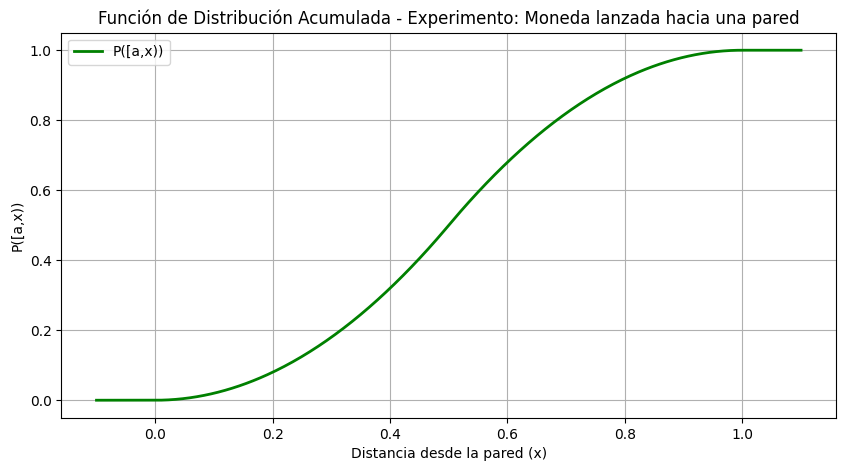

In [9]:
# Reimportar paquetes y redefinir todo tras el reinicio
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la distribución
a = 0
b = 1
c = 0.5

# Función de distribución acumulada (CDF) definida por tramos
def triangular_cdf(x, a=0, c=0.5, b=1):
    x = np.array(x)
    F = np.zeros_like(x, dtype=float)
    # Tramo a <= x < c
    mask1 = (x >= a) & (x < c)
    F[mask1] = ((x[mask1] - a)**2) / ((b - a) * (c - a))
    # Tramo c <= x <= b
    mask2 = (x >= c) & (x <= b)
    F[mask2] = 1 - ((b - x[mask2])**2) / ((b - a) * (b - c))
    # x > b
    F[x > b] = 1
    return F

# Dominio para graficar
x_vals = np.linspace(-0.1, 1.1, 500)
F_vals = triangular_cdf(x_vals)

# Graficar la función de distribución acumulada
plt.figure(figsize=(10, 5))
plt.plot(x_vals, F_vals, color='green', lw=2, label='P([a,x))')
plt.title('Función de Distribución Acumulada - Experimento: Moneda lanzada hacia una pared')
plt.xlabel('Distancia desde la pared (x)')
plt.ylabel('P([a,x))')
plt.grid(True)
plt.legend()
plt.show()


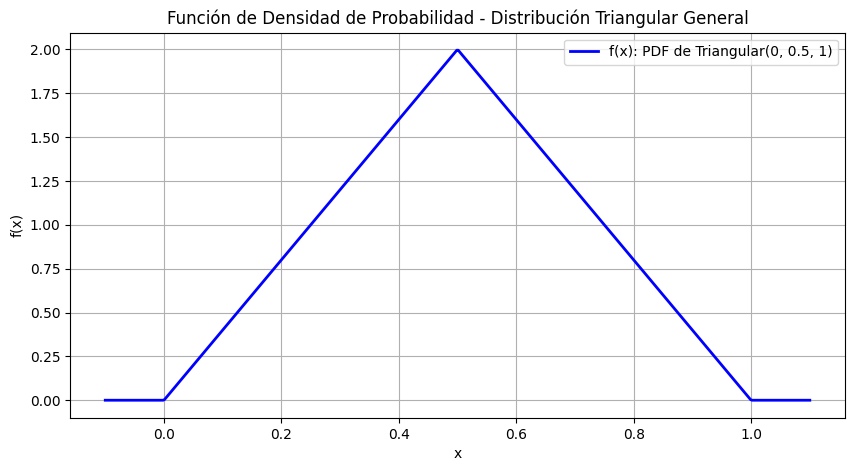

In [10]:
# Definición de la densidad triangular general
def triangular_pdf(x, a=0, c=0.5, b=1):
    x = np.array(x)
    f = np.zeros_like(x, dtype=float)
    # Tramo a <= x < c
    mask1 = (x >= a) & (x < c)
    f[mask1] = 2 * (x[mask1] - a) / ((b - a) * (c - a))
    # Tramo c <= x <= b
    mask2 = (x >= c) & (x <= b)
    f[mask2] = 2 * (b - x[mask2]) / ((b - a) * (b - c))
    return f

# Dominio para graficar
x_vals = np.linspace(-0.1, 1.1, 500)
f_vals = triangular_pdf(x_vals)

# Graficar la función de densidad
plt.figure(figsize=(10, 5))
plt.plot(x_vals, f_vals, color='blue', lw=2, label='f(x): PDF de Triangular(0, 0.5, 1)')
plt.title('Función de Densidad de Probabilidad - Distribución Triangular General')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show()


# Valor esperado de la distribución triangular

### Valor esperado de una variable con distribución triangular

Sea $$X \sim \text{Triangular}(a, c, b)$$, con $$a < c < b$$, el valor esperado se calcula como:

$$
\mathbb{E}[X] = \int_a^b x \cdot f_X(x) \, dx
$$

donde la función de densidad está definida por tramos como:


$$
\mathbb{E}[X] = \frac{a + b + c}{3}
$$

Esta expresión refleja el **promedio ponderado** de los extremos \( a \), \( b \), y el modo \( c \). En el caso simétrico (cuando $( c = \frac{a + b}{2} )$), se tiene:

$$
\mathbb{E}[X] = \frac{a + b}{2}
$$


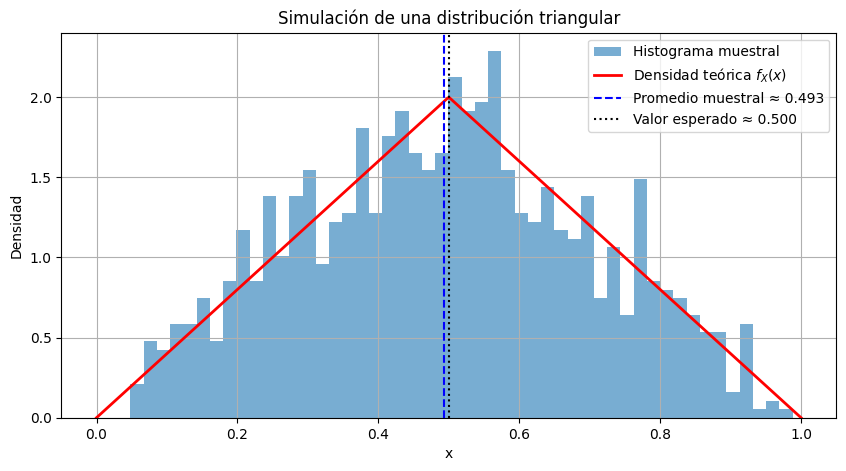

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import triang

# Parámetros de la distribución triangular
a = 0       # límite inferior
b = 1       # límite superior
c = 0.5     # modo (máximo de la densidad)
c_rel = (c - a) / (b - a)  # ubicación relativa del modo para scipy

# Crear la distribución triangular
dist = triang(c=c_rel, loc=a, scale=(b - a))

# Simular datos
np.random.seed(42)
n = 1000
samples = dist.rvs(size=n)

# Calcular promedio muestral
sample_mean = np.mean(samples)

# Valor teórico esperado
theoretical_mean = (a + b + c) / 3

# Graficar histograma y densidad teórica
x = np.linspace(a, b, 500)
fx = dist.pdf(x)

plt.figure(figsize=(10, 5))
plt.hist(samples, bins=50, density=True, alpha=0.6, label='Histograma muestral')
plt.plot(x, fx, 'r-', lw=2, label='Densidad teórica $f_X(x)$')
plt.axvline(sample_mean, color='blue', linestyle='--', label=f'Promedio muestral ≈ {sample_mean:.3f}')
plt.axvline(theoretical_mean, color='black', linestyle=':', label=f'Valor esperado ≈ {theoretical_mean:.3f}')
plt.xlabel('x')
plt.ylabel('Densidad')
plt.title('Simulación de una distribución triangular')
plt.legend()
plt.grid(True)
plt.show()


## Tarea

 - Revisar las propiedades del valor esperado
 - Revise el concepto de momento de inercia en física y que relación tiene con la varianza de una variable aleatoria (discreto y continuo)
 - Revise las propiedades de la varianza (discreto y continuo)